In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv', sep = "#")

In [4]:
df.head()

,Position,Track Name,Artist,Streams,Date,Genre
0,1,Starboy,The Weeknd,3135625,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"['pop', 'pop dance', 'tropical house', 'edm', ..."
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"['pop', 'electronic trap', 'dance pop', 'edm',..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"['pop', 'uk dance', 'dance pop', 'uk funky', '..."
4,5,One Dance,Drake,2259887,2017-01-01,"['toronto rap', 'canadian pop', 'canadian hip ..."


In [6]:
df.sort_values('Streams').head()

,Position,Track Name,Artist,Streams,Date,Genre
199,200,Ni**as In Paris,JAY-Z,325951,2017-01-01,"['rap', 'hip hop', 'east coast hip hop', 'pop ..."
399,200,Take Me To Church,Hozier,330936,2017-01-02,"['irish singer-songwriter', 'pop', 'modern rock']"
198,199,Secrets,The Weeknd,331233,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
197,198,Superstition - Single Version,Stevie Wonder,331376,2017-01-01,"['motown', 'soul', 'quiet storm', 'indie r&b',..."
196,197,Oh Lord,MiC LOWRY,331792,2017-01-01,"['pop r&b', 'trap soul', 'post-teen pop', 'r&b..."


In [10]:
df.sample(frac=0.1).head()

,Position,Track Name,Artist,Streams,Date,Genre
308583,184,"Whats Poppin (feat. DaBaby, Tory Lanez & Lil W...",Jack Harlow,759517,2021-04-02,"['kentucky hip hop', 'rap', 'deep underground ..."
309990,191,Jocelyn Flores,XXXTENTACION,815772,2021-04-09,"['miami hip hop', 'emo rap']"
114230,31,Vaina Loca,Ozuna,1695559,2018-07-30,"['puerto rican pop', 'trap latino', 'reggaeton..."
105461,62,Walk It Talk It,Migos,1071876,2018-06-16,"['rap', 'atl hip hop', 'trap', 'pop rap']"
310329,130,Breathe (feat. Colbie Caillat) (Taylor’s Version),Taylor Swift,841149,2021-04-11,"['pop', 'post-teen pop']"


In [17]:
df_time = df.groupby('Date').sum()[['Streams']]
df_time.head()

,Streams
Date,
2017-01-01,148613167
2017-01-02,154810836
2017-01-03,166239930
2017-01-04,169252507
2017-01-05,169919094


In [18]:
import seaborn as sns

<AxesSubplot:xlabel='Date', ylabel='Streams'>

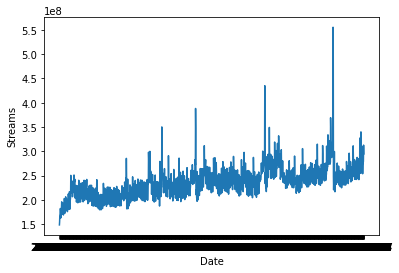

In [20]:
sns.lineplot(x=df_time.index, y=df_time.Streams)

In [42]:
ts = pd.Series(df_time["Streams"].values, index=df_time.index)
mean_smoothed = ts.rolling(window=30).mean()
# mean_smoothed
df2 = pd.DataFrame(mean_smoothed)
df2.columns = ["MA"]
df3 = pd.concat([df_time, df2], axis=1).query("MA == MA")
df3.head()

,Streams,MA
Date,,
2017-01-30,182877456,1.800430e+08
2017-01-31,190191924,1.814290e+08
2017-02-01,193633315,1.827231e+08
2017-02-02,194517087,1.836656e+08
2017-02-03,206406926,1.849041e+08


<AxesSubplot:xlabel='Date', ylabel='MA'>

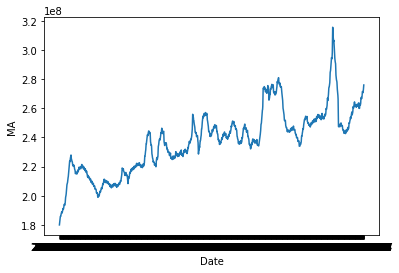

In [43]:
#df3_s = df3.sample(frac = 0.1)
sns.lineplot(x=df3.index, y=df3.MA)